## 1. Set Up Google Colab & Libraries Import


In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import load_img

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
base_path = '/content/drive/MyDrive/drive-download-20241217T141329Z-001'
train_path = os.path.join(base_path, 'train')
annotations_path = os.path.join(base_path, '_Annotations.csv')

# Load annotations CSV
annotations = pd.read_csv(annotations_path)

# Display the first few rows of annotations
print("Annotations:")
print(annotations.head())


Mounted at /content/drive
Annotations:
                                            filename  width  height    class  \
0  Plastic_340_jpg.rf.81b88e8bd518cec7f83b5c0a3fa...    640     640  PLASTIC   
1  Plastic_516_jpg.rf.820a0ed8b720af4ee305af1322d...    640     640  PLASTIC   
2  Plastic_97_jpg.rf.8178ddfb1a6c509e7156acbccd64...    640     640  PLASTIC   
3  metal_278_jpg.rf.81b0d768636124928d8920a023b29...    640     640    METAL   
4  Plastic_9_jpg.rf.81b6a9583f309e8496910bf723393...    640     640  PLASTIC   

   xmin  ymin  xmax  ymax  
0   165    84   355   552  
1   204    44   475   547  
2    46    83   571   502  
3    10     0   515   477  
4   103   153   589   519  


## 2. Inspect the Dataset


Summary of Annotations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428 entries, 0 to 4427
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  4428 non-null   object
 1   width     4428 non-null   int64 
 2   height    4428 non-null   int64 
 3   class     4428 non-null   object
 4   xmin      4428 non-null   int64 
 5   ymin      4428 non-null   int64 
 6   xmax      4428 non-null   int64 
 7   ymax      4428 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 276.9+ KB
None
Missing Values:
filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64
Class Distribution:
class
ORGANIC    1681
PAPER      1031
PLASTIC    1026
METAL       690
Name: count, dtype: int64


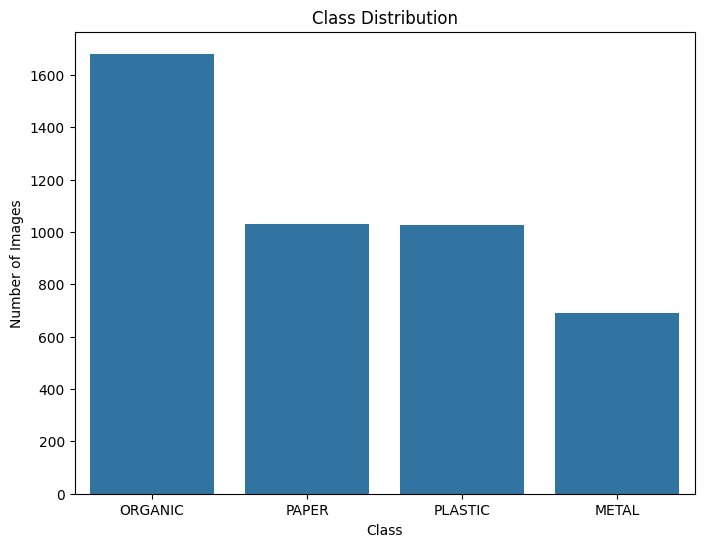

In [ ]:
# Check the dataset's structure and details
print("Summary of Annotations:")
print(annotations.info())

# Check for missing values
print("Missing Values:")
print(annotations.isnull().sum())

# Distribution of classes
class_distribution = annotations['class'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


## 3. Visualize Sample Images


Visualizing class: ORGANIC


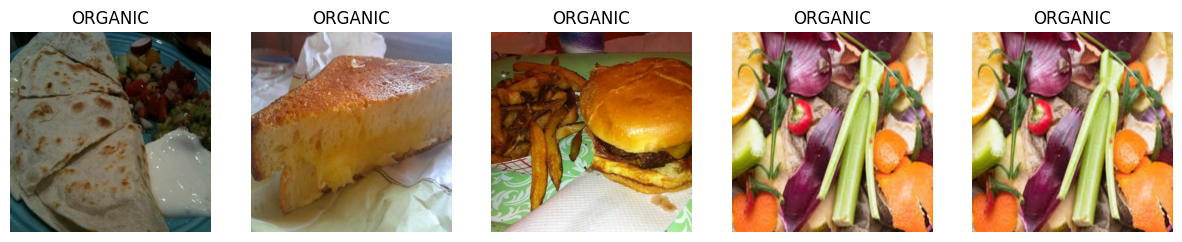

Visualizing class: PAPER


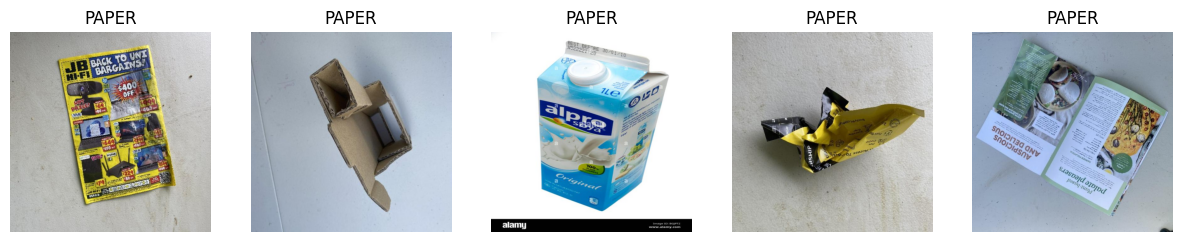

Visualizing class: PLASTIC


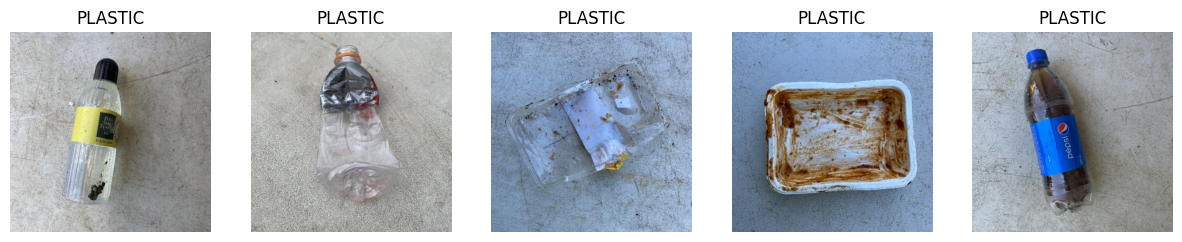

Visualizing class: METAL


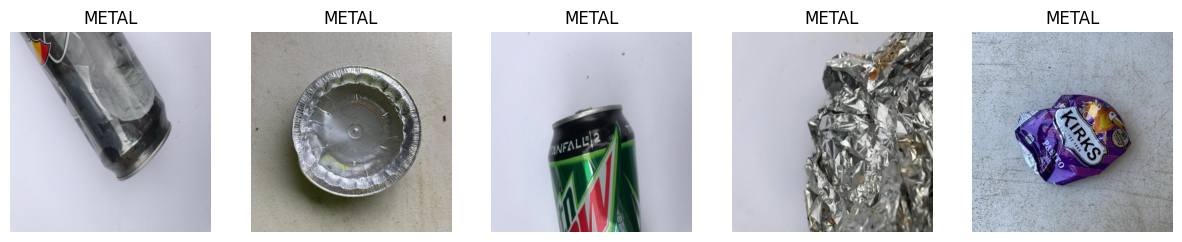

In [ ]:
# Function to visualize sample images
def plot_sample_images(dataset_path, annotations, class_name, num_images=5):
    sample_images = annotations[annotations['class'] == class_name]['filename'].head(num_images)
    plt.figure(figsize=(15, 10))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(dataset_path, img_name)
        img = load_img(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.show()

# Visualize sample images for each class
for class_name in class_distribution.index:
    print(f"Visualizing class: {class_name}")
    plot_sample_images(train_path, annotations, class_name)


## 4. Analyze Bounding Box Dimensions


Bounding Box Width Stats:
count    4428.000000
mean      377.448735
std       152.432162
min         3.000000
25%       262.000000
50%       375.000000
75%       495.000000
max       640.000000
Name: box_width, dtype: float64
Bounding Box Height Stats:
count    4428.000000
mean      386.578591
std       146.354422
min         4.000000
25%       280.000000
50%       392.000000
75%       500.000000
max       640.000000
Name: box_height, dtype: float64


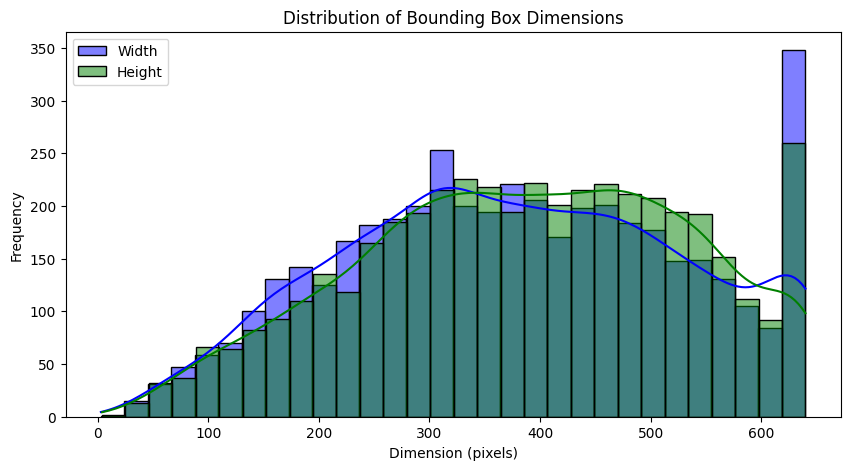

In [ ]:
# Calculate bounding box width and height
annotations['box_width'] = annotations['xmax'] - annotations['xmin']
annotations['box_height'] = annotations['ymax'] - annotations['ymin']

# Display statistics for bounding box dimensions
print("Bounding Box Width Stats:")
print(annotations['box_width'].describe())

print("Bounding Box Height Stats:")
print(annotations['box_height'].describe())

# Plot distribution of bounding box widths and heights
plt.figure(figsize=(10, 5))
sns.histplot(annotations['box_width'], kde=True, bins=30, color='blue', label='Width')
sns.histplot(annotations['box_height'], kde=True, bins=30, color='green', label='Height')
plt.legend()
plt.title('Distribution of Bounding Box Dimensions')
plt.xlabel('Dimension (pixels)')
plt.ylabel('Frequency')
plt.show()


## 5. Analyze Image Size


In [ ]:
# Check unique image dimensions
unique_sizes = annotations[['width', 'height']].drop_duplicates()
print("Unique Image Sizes:")
print(unique_sizes)

# If not consistent, visualize the sizes
if len(unique_sizes) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=annotations, x='width', y='height', hue='class')
    plt.title('Image Size Distribution')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.show()


Unique Image Sizes:
   width  height
0    640     640


## 6. Check for Class Imbalance


<ipython-input-6-6f1f2483ed90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


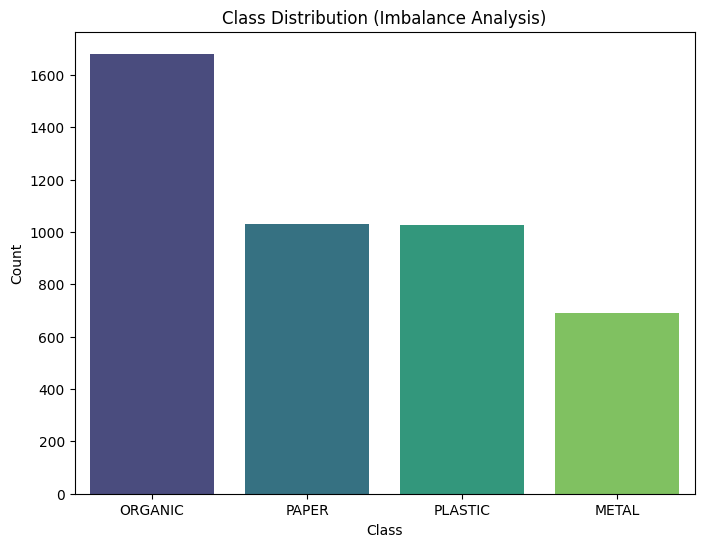

In [ ]:
# Check for class imbalance
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution (Imbalance Analysis)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## 7. Correlation Between Bounding Box and Class


Mean Bounding Box Dimensions by Class:
          box_width  box_height
class                          
METAL    373.379710  413.768116
ORGANIC  359.235574  349.259369
PAPER    434.976722  439.376334
PLASTIC  352.217349  376.382066


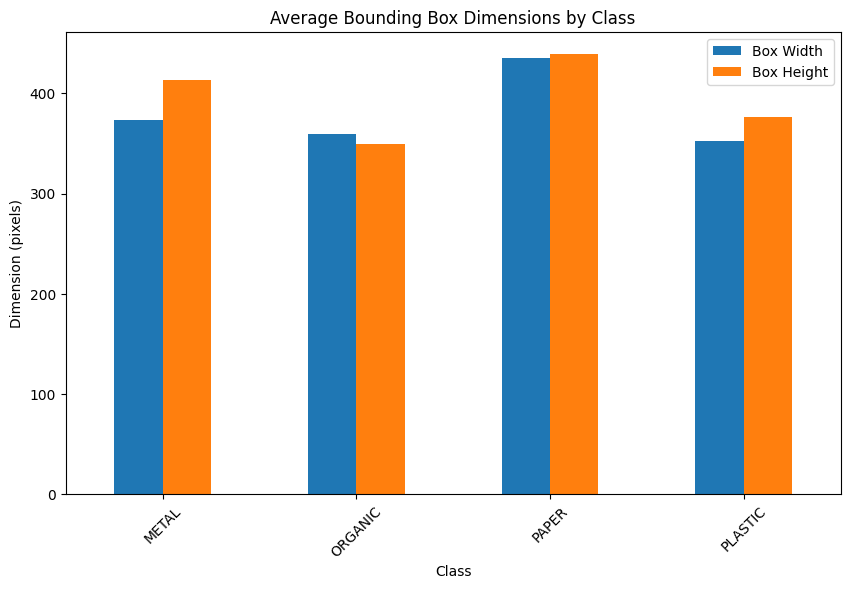

In [ ]:
# Group by class and calculate mean box dimensions
box_stats_by_class = annotations.groupby('class')[['box_width', 'box_height']].mean()
print("Mean Bounding Box Dimensions by Class:")
print(box_stats_by_class)

# Visualize box dimensions by class
box_stats_by_class.plot(kind='bar', figsize=(10, 6))
plt.title('Average Bounding Box Dimensions by Class')
plt.xlabel('Class')
plt.ylabel('Dimension (pixels)')
plt.xticks(rotation=45)
plt.legend(['Box Width', 'Box Height'])
plt.show()


## 8. Preprocess the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Using GPU:", tf.test.gpu_device_name())

# Ensure GPU is used
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

# Split into 80% train and 20% remaining
train_annotations, remaining_annotations = train_test_split(
    annotations, test_size=0.2, random_state=42, stratify=annotations['class']
)

# Split remaining 20% into 10% validation and 10% test
valid_annotations, test_annotations = train_test_split(
    remaining_annotations, test_size=0.5, random_state=42, stratify=remaining_annotations['class']
)

# Confirm split sizes
print(f"Train samples: {len(train_annotations)}")
print(f"Validation samples: {len(valid_annotations)}")
print(f"Test samples: {len(test_annotations)}")


Num GPUs Available:  1
Using GPU: /device:GPU:0
Train samples: 3542
Validation samples: 443
Test samples: 443


## 9. Organize Images into Class-Based Folders

In [ ]:
from tqdm import tqdm  # For progress bar
import shutil

# Function to organize images into class folders
def organize_images(annotations_df, dataset_path, output_path):
    os.makedirs(output_path, exist_ok=True)
    for class_name in annotations_df['class'].unique():
        os.makedirs(os.path.join(output_path, class_name), exist_ok=True)

    total_images = len(annotations_df)
    print(f"Organizing {total_images} images into {output_path}...")

    for idx, row in tqdm(enumerate(annotations_df.iterrows()), total=total_images, desc="Processing Images"):
        src = os.path.join(dataset_path, row[1]['filename'])
        dst = os.path.join(output_path, row[1]['class'], os.path.basename(row[1]['filename']))
        if os.path.exists(src):
            shutil.copy(src, dst)
        if (idx + 1) % 100 == 0 or (idx + 1) == total_images:
            print(f"Processed {idx + 1} out of {total_images} images")

# Define output directories
train_output_path = '/content/train_images'
valid_output_path = '/content/valid_images'
test_output_path = '/content/test_images'

# Organize images
organize_images(train_annotations, train_path, train_output_path)
organize_images(valid_annotations, train_path, valid_output_path)
organize_images(test_annotations, train_path, test_output_path)
print("Images successfully organized into train, valid, and test folders.")

Organizing 3542 images into /content/train_images...


Processing Images:   3%|▎         | 100/3542 [00:35<21:27,  2.67it/s]

Processed 100 out of 3542 images


Processing Images:   6%|▌         | 200/3542 [01:11<18:12,  3.06it/s]

Processed 200 out of 3542 images


Processing Images:   8%|▊         | 300/3542 [01:45<17:13,  3.14it/s]

Processed 300 out of 3542 images


Processing Images:  11%|█▏        | 400/3542 [02:20<23:43,  2.21it/s]

Processed 400 out of 3542 images


Processing Images:  14%|█▍        | 500/3542 [02:53<15:11,  3.34it/s]

Processed 500 out of 3542 images


Processing Images:  17%|█▋        | 600/3542 [03:24<16:39,  2.94it/s]

Processed 600 out of 3542 images


Processing Images:  20%|█▉        | 699/3542 [03:58<13:31,  3.51it/s]

Processed 700 out of 3542 images


Processing Images:  23%|██▎       | 800/3542 [04:32<15:24,  2.97it/s]

Processed 800 out of 3542 images


Processing Images:  25%|██▌       | 900/3542 [05:03<13:53,  3.17it/s]

Processed 900 out of 3542 images


Processing Images:  28%|██▊       | 1000/3542 [05:38<11:57,  3.54it/s]

Processed 1000 out of 3542 images


Processing Images:  31%|███       | 1100/3542 [06:07<10:09,  4.01it/s]

Processed 1100 out of 3542 images


Processing Images:  34%|███▍      | 1200/3542 [06:39<10:42,  3.65it/s]

Processed 1200 out of 3542 images


Processing Images:  37%|███▋      | 1300/3542 [07:12<15:58,  2.34it/s]

Processed 1300 out of 3542 images


Processing Images:  40%|███▉      | 1400/3542 [07:44<11:28,  3.11it/s]

Processed 1400 out of 3542 images


Processing Images:  42%|████▏     | 1500/3542 [08:18<12:26,  2.74it/s]

Processed 1500 out of 3542 images


Processing Images:  45%|████▌     | 1600/3542 [08:51<09:45,  3.32it/s]

Processed 1600 out of 3542 images


Processing Images:  48%|████▊     | 1700/3542 [09:22<10:36,  2.90it/s]

Processed 1700 out of 3542 images


Processing Images:  51%|█████     | 1800/3542 [09:52<10:00,  2.90it/s]

Processed 1800 out of 3542 images


Processing Images:  54%|█████▎    | 1900/3542 [10:21<07:52,  3.48it/s]

Processed 1900 out of 3542 images


Processing Images:  56%|█████▋    | 2000/3542 [10:50<07:18,  3.51it/s]

Processed 2000 out of 3542 images


Processing Images:  59%|█████▉    | 2100/3542 [11:20<06:05,  3.95it/s]

Processed 2100 out of 3542 images


Processing Images:  62%|██████▏   | 2200/3542 [11:51<06:33,  3.41it/s]

Processed 2200 out of 3542 images


Processing Images:  65%|██████▍   | 2300/3542 [12:23<05:48,  3.56it/s]

Processed 2300 out of 3542 images


Processing Images:  68%|██████▊   | 2399/3542 [13:00<09:09,  2.08it/s]

Processed 2400 out of 3542 images


Processing Images:  71%|███████   | 2499/3542 [13:28<05:36,  3.10it/s]

Processed 2500 out of 3542 images


Processing Images:  73%|███████▎  | 2600/3542 [13:55<04:16,  3.67it/s]

Processed 2600 out of 3542 images


Processing Images:  76%|███████▌  | 2700/3542 [14:22<04:33,  3.08it/s]

Processed 2700 out of 3542 images


Processing Images:  79%|███████▉  | 2800/3542 [14:51<04:24,  2.81it/s]

Processed 2800 out of 3542 images


Processing Images:  82%|████████▏ | 2900/3542 [15:19<07:32,  1.42it/s]

Processed 2900 out of 3542 images


Processing Images:  85%|████████▍ | 3000/3542 [15:54<02:17,  3.95it/s]

Processed 3000 out of 3542 images


Processing Images:  88%|████████▊ | 3100/3542 [16:21<02:09,  3.41it/s]

Processed 3100 out of 3542 images


Processing Images:  90%|█████████ | 3199/3542 [16:51<01:27,  3.91it/s]

Processed 3200 out of 3542 images


Processing Images:  93%|█████████▎| 3300/3542 [17:17<01:19,  3.04it/s]

Processed 3300 out of 3542 images


Processing Images:  96%|█████████▌| 3400/3542 [17:44<00:26,  5.35it/s]

Processed 3400 out of 3542 images


Processing Images:  99%|█████████▉| 3500/3542 [18:13<00:10,  3.90it/s]

Processed 3500 out of 3542 images


Processing Images: 100%|██████████| 3542/3542 [18:23<00:00,  3.21it/s]


Processed 3542 out of 3542 images
Organizing 443 images into /content/valid_images...


Processing Images:  23%|██▎       | 100/443 [00:27<01:22,  4.14it/s]

Processed 100 out of 443 images


Processing Images:  45%|████▌     | 200/443 [00:54<01:18,  3.11it/s]

Processed 200 out of 443 images


Processing Images:  67%|██████▋   | 299/443 [01:18<00:41,  3.48it/s]

Processed 300 out of 443 images


Processing Images:  90%|█████████ | 400/443 [01:46<00:16,  2.66it/s]

Processed 400 out of 443 images


Processing Images: 100%|██████████| 443/443 [01:57<00:00,  3.77it/s]


Processed 443 out of 443 images
Organizing 443 images into /content/test_images...


Processing Images:  23%|██▎       | 100/443 [00:25<01:05,  5.22it/s]

Processed 100 out of 443 images


Processing Images:  45%|████▍     | 199/443 [00:49<00:56,  4.32it/s]

Processed 200 out of 443 images


Processing Images:  68%|██████▊   | 300/443 [01:21<00:42,  3.34it/s]

Processed 300 out of 443 images


Processing Images:  90%|████████▉ | 398/443 [01:46<00:15,  3.00it/s]

Processed 400 out of 443 images


Processing Images: 100%|██████████| 443/443 [01:58<00:00,  3.73it/s]

Processed 443 out of 443 images
Images successfully organized into train, valid, and test folders.


## 10. Create Data Generators

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define output directories
train_output_path = '/content/train_images'
valid_output_path = '/content/valid_images'
test_output_path = '/content/test_images'

# Data loaders
datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_output_path,
    target_size=(640, 640),
    batch_size=32,
    class_mode='categorical',
    shuffle=True  # Ensure data is shuffled for each epoch
)

valid_generator = datagen.flow_from_directory(
    valid_output_path, target_size=(640, 640), batch_size=32, class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    test_output_path, target_size=(640, 640), batch_size=32, class_mode='categorical', shuffle=False
)

print("Data generators created.")

Found 2990 images belonging to 4 classes.
Found 435 images belonging to 4 classes.
Found 434 images belonging to 4 classes.
Data generators created.


## 11. Train the Model

In [3]:
# Define the model (same CNN as earlier)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(640, 640, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 638, 638, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 319, 319, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 317, 317, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 158, 158, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 156, 156, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 78, 78, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 778752)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      99,680,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,774,148 (380.61 MB)

 Trainable params: 99,774,148 (380.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 109s 867ms/step - accuracy: 0.3785 - loss: 7.6101 - val_accuracy: 0.6000 - val_loss: 1.0922
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 51s 517ms/step - accuracy: 0.5296 - loss: 1.0896 - val_accuracy: 0.6345 - val_loss: 0.8676
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 51s 520ms/step - accuracy: 0.6268 - loss: 0.9785 - val_accuracy: 0.7011 - val_loss: 0.7822
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 507ms/step - accuracy: 0.6853 - loss: 0.8092 - val_accuracy: 0.7057 - val_loss: 0.7672
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 53s 537ms/step - accuracy: 0.7466 - loss: 0.6701 - val_accuracy: 0.7471 - val_loss: 0.7325
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 81s 531ms/step - accuracy: 0.8232 - loss: 0.4984 - val_accuracy: 0.7655 - val_loss: 0.7507
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 509ms/step - accuracy: 0.8752 - loss: 0.3771 - val_accuracy: 0.7126 - val_loss: 0.9787
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 51s 514ms/step - accuracy: 0.9119 - loss: 0.2676 - val_accuracy: 0.75

## Evaluate the Model on the Test Set

In [4]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 895ms/step - accuracy: 0.7146 - loss: 1.1783
Test Loss: 1.1595975160598755
Test Accuracy: 0.7281106114387512


## Plot Accuracy and Loss

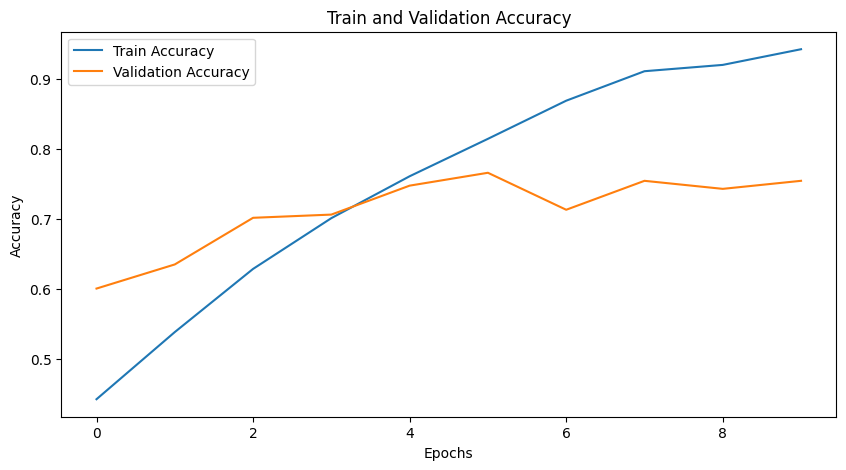

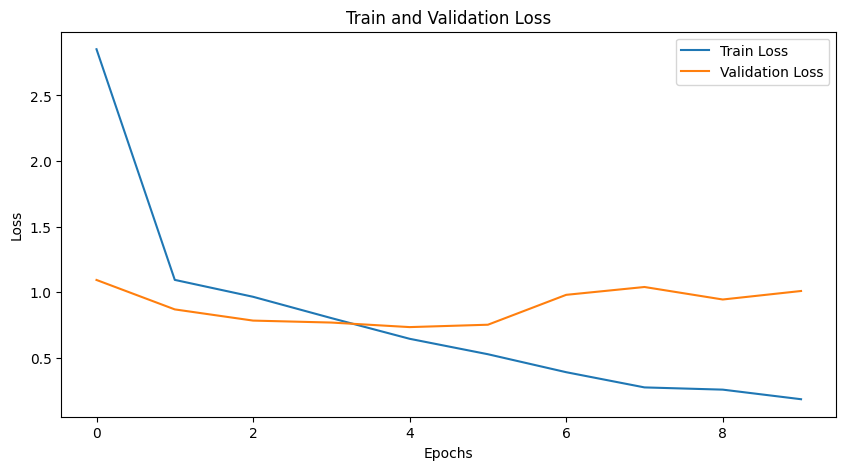

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 583ms/step


<Figure size 800x600 with 0 Axes>

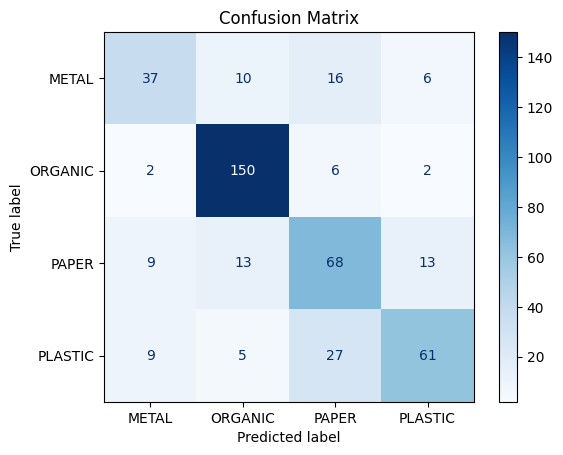

Classification Report:
              precision    recall  f1-score   support

       METAL       0.65      0.54      0.59        69
     ORGANIC       0.84      0.94      0.89       160
       PAPER       0.58      0.66      0.62       103
     PLASTIC       0.74      0.60      0.66       102

    accuracy                           0.73       434
   macro avg       0.70      0.68      0.69       434
weighted avg       0.73      0.73      0.72       434



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Predict on Test Data
test_generator.reset()  # Reset the generator to start predictions from the beginning
predictions = model.predict(test_generator)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# True class labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Class names

# Step 2: Compute Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 3: Display the Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Step 4: Print Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 2990 images belonging to 4 classes.
Found 435 images belonging to 4 classes.
Found 434 images belonging to 4 classes.


<ipython-input-1-598a6403a992>:31: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(640, 640, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 640, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 20, 20, 1280)        │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6738 - loss: 0.8002 - val_accuracy: 0.9057 - val_loss: 0.2991
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 477ms/step - accuracy: 0.8779 - loss: 0.3551 - val_accuracy: 0.9103 - val_loss: 0.2563
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 463ms/step - accuracy: 0.9088 - loss: 0.2648 - val_accuracy: 0.9218 - val_loss: 0.2252
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 505ms/step - accuracy: 0.9033 - loss: 0.2598 - val_accuracy: 0.9425 - val_loss: 0.1708
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 456ms/step - accuracy: 0.9263 - loss: 0.2052 - val_accuracy: 0.9471 - val_loss: 0.1643
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 473ms/step - accuracy: 0.9258 - loss: 0.1972 - val_accuracy: 0.9448 - val_loss: 0.1425
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 456ms/step - accuracy: 0.9400 - loss: 0.1730 - val_accuracy: 0.9471 - val_loss: 0.1421
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 87s 500ms/step - accuracy: 0.9551 - loss: 0.1371 - val_accuracy: 0.9379 

<Figure size 800x600 with 0 Axes>

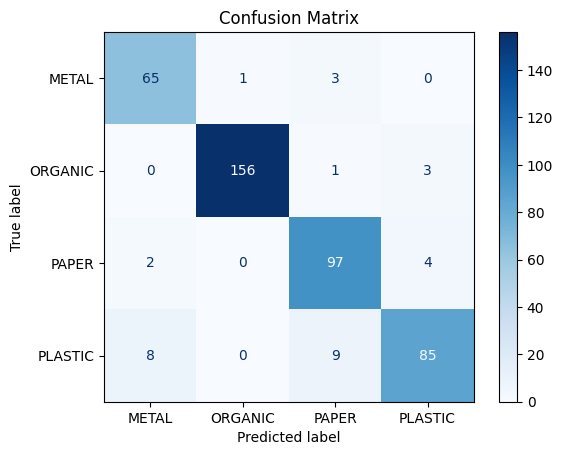

Classification Report:
              precision    recall  f1-score   support

       METAL       0.87      0.94      0.90        69
     ORGANIC       0.99      0.97      0.98       160
       PAPER       0.88      0.94      0.91       103
     PLASTIC       0.92      0.83      0.88       102

    accuracy                           0.93       434
   macro avg       0.92      0.92      0.92       434
weighted avg       0.93      0.93      0.93       434



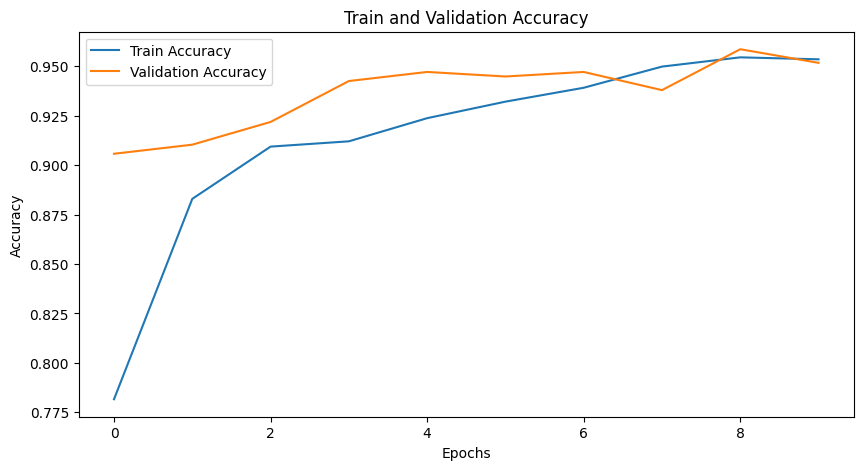

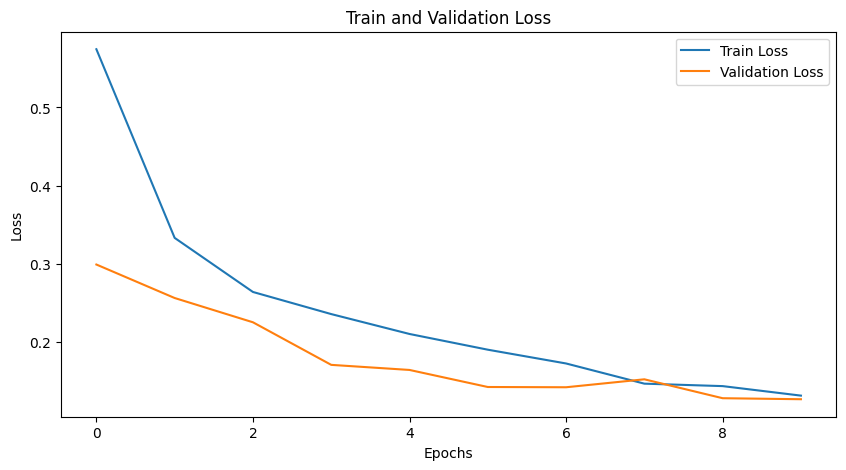

In [1]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define directories
train_dir = '/content/train_images'
valid_dir = '/content/valid_images'
test_dir = '/content/test_images'

# Step 1: Create Data Generators
datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=(640, 640), batch_size=32, class_mode='categorical', shuffle=True
)
valid_generator = datagen.flow_from_directory(
    valid_dir, target_size=(640, 640), batch_size=32, class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    test_dir, target_size=(640, 640), batch_size=32, class_mode='categorical', shuffle=False
)

# Step 2: Load MobileNetV2 Pretrained Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(640, 640, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
inputs = Input(shape=(640, 640, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='softmax')(x)  # 4 classes

# Compile the model
model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Step 3: Train the Model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)

# Step 4: Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Step 5: Confusion Matrix and Classification Report
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Step 6: Accuracy and Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [2]:
# Save the trained model
model.save('/content/mobilenetv2_waste_classifier.h5')
print("Model saved successfully!")


Model saved successfully!
